### **Titanic Data Analysis**
![Titanic](titanic.jpg)

#### **Prelude**
- Basic importations
- Initial data set viewing
- Data set splitting

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('data/train.csv', index_col="PassengerId")
X_test = pd.read_csv('data/test.csv', index_col="PassengerId")
train_df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [2]:
feature_names = list(train_df.columns)
feature_names.remove("Survived")
X_train = train_df[feature_names].copy()
y_train = train_df["Survived"].copy()
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### Some data cleaning steps

In [3]:
X_train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [4]:
X_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [5]:
X_train.drop("Cabin", axis=1, inplace=True)
X_test.drop("Cabin", axis=1, inplace=True)
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [6]:
wrong_fare_vals = X_train.where(X_train.Fare > 300).dropna()
wrong_fare_vals
# Looks like Fare contains some wrong values

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
259,1.0,"Ward, Miss. Anna",female,35.0,0.0,0.0,PC 17755,512.3292,C
680,1.0,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0.0,1.0,PC 17755,512.3292,C
738,1.0,"Lesurer, Mr. Gustave J",male,35.0,0.0,0.0,PC 17755,512.3292,C


In [7]:
X_train.drop(wrong_fare_vals.index, inplace=True) # Drop 'em
y_train.drop(wrong_fare_vals.index, inplace=True) # Also in y
X_train.Fare.where(X_train.Fare > 300).any()

False

In [8]:
X_train[~(X_train.Age > 0)].dropna()  # Other than null, no invalid age

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,


In [9]:
X_train["Embarked"].fillna("Unknown", inplace=True)
X_test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

#### Feature Engineering

In [10]:
# Get Ticket values prefix
t_fix_ = X_train.Ticket.str.split(r'\s')
t_prefix = t_fix_.str[0].str.extract(r'(.*\D+.*)')[0] #  Extract to make pure numerical values null -- to display values with prefixes only
t_prefix.value_counts() # --- Observe redundancy between values like C.A., CA, CA. etc

0
PC            57
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
A/5.           7
SOTON/OQ       7
STON/O2.       6
CA             6
F.C.C.         5
C              5
SC/PARIS       5
S.O.C.         5
SC/Paris       4
LINE           4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
A.5.           2
A./5.          2
P/PP           2
WE/P           2
SOTON/O2       2
S.C./PARIS     2
S.W./PP        1
F.C.           1
A/S            1
SO/C           1
W/C            1
SC             1
SCO/W          1
SW/PP          1
Fa             1
S.O.P.         1
S.C./A.4.      1
A4.            1
S.P.           1
W.E.P.         1
C.A./SOTON     1
Name: count, dtype: int64

In [11]:
# Get Ticket values prefix also on test data
test_t_fix_ = X_test.Ticket.str.split(r'\s')
test_t_prefix = test_t_fix_.str[0].str.extract(r'(.*\D+.*)')[0] #  Extract to make pure numerical values null -- to display values with prefixes only
test_t_prefix.value_counts() # --- Observe redundancy between values like C.A., CA, CA. etc

0
PC            32
C.A.          19
SOTON/O.Q.     8
SC/PARIS       6
W./C.          5
CA.            4
S.O./P.P.      4
CA             4
F.C.C.         4
A/4            3
C              3
A/5.           3
F.C.           2
A/5            2
S.O.C.         2
STON/O         2
SC/AH          2
LP             1
SC/Paris       1
AQ/4           1
SC             1
A.             1
S.C./PARIS     1
AQ/3.          1
STON/OQ.       1
SOTON/O2       1
SC/A4          1
SOTON/OQ       1
W.E.P.         1
PP             1
A./5.          1
SC/A.3         1
STON/O2.       1
A.5.           1
Name: count, dtype: int64

In [12]:
# Eliminate all redundancy by combining similar values -- Train set
dict = {'CA': 'C.A.', 'CA.': 'C.A.', 'C.A./SOTON': 'C.A.', 'A./5.': 'A/5', 'A/5.': 'A/5','A.5.': 'A/5', 'A4.': 'A/4', 'A/4.': 'A/4', 'S.C./A.4.': 'A/4', 'SOTON/O.Q.': 'SOTON/OQ', 'SC/PARIS': 'SC/Paris', 'S.C./PARIS': 'SC/Paris', 'W./C.': 'W/C', 'S.W./PP': 'PP', 'SW/PP': 'PP', 'P/PP': 'PP', 'S.O./P.P.': 'PP', 'STON/O2.': 'STON/O', 'SOTON/O2': 'SOTON/OQ'}
t_prefix.replace(dict, inplace=True)
idx = t_prefix.value_counts().index
t_prefix.value_counts()

0
PC          57
C.A.        42
A/5         21
STON/O      18
SOTON/OQ    17
SC/Paris    11
W/C         10
PP          10
A/4          8
C            5
F.C.C.       5
S.O.C.       5
LINE         4
SC/AH        3
WE/P         2
SCO/W        1
SC           1
A/S          1
W.E.P.       1
Fa           1
S.O.P.       1
SO/C         1
S.P.         1
F.C.         1
Name: count, dtype: int64

In [13]:
# Eliminate all redundancy by combining similar values -- Test set
test_t_prefix.replace(dict, inplace=True)
test_t_prefix.value_counts()

0
PC          32
C.A.        27
SOTON/OQ    10
SC/Paris     8
A/5          7
W/C          5
PP           5
F.C.C.       4
A/4          3
C            3
STON/O       3
SC/AH        2
F.C.         2
S.O.C.       2
AQ/4         1
LP           1
SC           1
A.           1
SC/A.3       1
SC/A4        1
STON/OQ.     1
W.E.P.       1
AQ/3.        1
Name: count, dtype: int64

In [14]:
# Replace pure numericals (null) with "numericals" string -- Train and test set
test_t_prefix.fillna("numericals", inplace=True)
t_prefix.fillna("numericals", inplace=True)
t_prefix   # All set

PassengerId
1             A/5
2              PC
3          STON/O
4      numericals
5      numericals
          ...    
887    numericals
888    numericals
889           W/C
890    numericals
891    numericals
Name: 0, Length: 888, dtype: object

In [15]:
# One hot encode our prefixes -- Train data
t_prefix_en = pd.get_dummies(t_prefix, prefix="Ticket").astype('int64')
idx = "Ticket_" + np.array(idx) 
t_prefix_en = t_prefix_en[idx[:10]]
t_prefix_en

,Ticket_PC,Ticket_C.A.,Ticket_A/5,Ticket_STON/O,Ticket_SOTON/OQ,Ticket_SC/Paris,Ticket_W/C,Ticket_PP,Ticket_A/4,Ticket_C
PassengerId,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,1,0,0,0


In [16]:
# One hot encode our prefixes -- Test data
test_t_prefix_en = pd.get_dummies(test_t_prefix, prefix="Ticket").astype('int64')
test_t_prefix_en = test_t_prefix_en[idx[:10]]
test_t_prefix_en

,Ticket_PC,Ticket_C.A.,Ticket_A/5,Ticket_STON/O,Ticket_SOTON/OQ,Ticket_SC/Paris,Ticket_W/C,Ticket_PP,Ticket_A/4,Ticket_C
PassengerId,,,,,,,,,,
892,0,0,0,0,0,0,0,0,0,0
893,0,0,0,0,0,0,0,0,0,0
894,0,0,0,0,0,0,0,0,0,0
895,0,0,0,0,0,0,0,0,0,0
896,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1305,0,0,1,0,0,0,0,0,0,0
1306,1,0,0,0,0,0,0,0,0,0
1307,0,0,0,0,1,0,0,0,0,0


In [17]:
X_train = pd.concat([X_train, t_prefix_en], axis=1)
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_PC,Ticket_C.A.,Ticket_A/5,Ticket_STON/O,Ticket_SOTON/OQ,Ticket_SC/Paris,Ticket_W/C,Ticket_PP,Ticket_A/4,Ticket_C
PassengerId,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,0,0,0,0,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0,0,0,0,0,0,0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,0,0,0,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,0,0,0,0,0,0
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,0,0,0,0,0,0,0,0,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,0,0,0,0,0,0,0,0
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0,0,0,0,0,0,1,0,0,0


In [18]:
X_test = pd.concat([X_test, test_t_prefix_en], axis=1)
X_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_PC,Ticket_C.A.,Ticket_A/5,Ticket_STON/O,Ticket_SOTON/OQ,Ticket_SC/Paris,Ticket_W/C,Ticket_PP,Ticket_A/4,Ticket_C
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,0,0,0,0,0,0,0,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,0,0,0,0,0,0,0,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,0,0,0,0,0,0,0,0,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,0,0,0,0,0,0,0,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,0,0,1,0,0,0,0,0,0,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,0,0,0,0,0,0,0,0,0
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,0,0,0,1,0,0,0,0,0


In [19]:
# Leverage Names string length  -- Train and test
X_train["Names_length"] =  X_train["Name"].str.len()
X_test["Names_length"] =  X_test["Name"].str.len()
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_PC,Ticket_C.A.,Ticket_A/5,Ticket_STON/O,Ticket_SOTON/OQ,Ticket_SC/Paris,Ticket_W/C,Ticket_PP,Ticket_A/4,Ticket_C,Names_length
PassengerId,,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,0,0,0,0,0,23
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0,0,0,0,0,0,0,0,51
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,0,0,0,0,22
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,0,0,0,0,0,0,44
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,0,0,0,0,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,0,0,0,0,0,0,0,0,0,21
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,0,0,0,0,0,0,0,0,28
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,0,0,0,0,0,0,1,0,0,0,40


In [20]:
# Drop useless cols -- Train and test
X_train.drop(["Ticket", "Name"], axis=1, inplace=True)
X_test.drop(["Ticket", "Name"], axis=1, inplace=True)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_PC,Ticket_C.A.,Ticket_A/5,Ticket_STON/O,Ticket_SOTON/OQ,Ticket_SC/Paris,Ticket_W/C,Ticket_PP,Ticket_A/4,Ticket_C,Names_length
PassengerId,,,,,,,,,,,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,0,0,1,0,0,0,0,0,0,0,23
2,1,female,38.0,1,0,71.2833,C,1,0,0,0,0,0,0,0,0,0,51
3,3,female,26.0,0,0,7.9250,S,0,0,0,1,0,0,0,0,0,0,22
4,1,female,35.0,1,0,53.1000,S,0,0,0,0,0,0,0,0,0,0,44
5,3,male,35.0,0,0,8.0500,S,0,0,0,0,0,0,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S,0,0,0,0,0,0,0,0,0,0,21
888,1,female,19.0,0,0,30.0000,S,0,0,0,0,0,0,0,0,0,0,28
889,3,female,NaN,1,2,23.4500,S,0,0,0,0,0,0,1,0,0,0,40


In [21]:
# Combine SibSp and Parch as FamilySize  -- Train and test
X_train["FamilySize"] = X_train["SibSp"] + X_train["Parch"]
X_test["FamilySize"] = X_test["SibSp"] + X_test["Parch"]
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_PC,Ticket_C.A.,Ticket_A/5,Ticket_STON/O,Ticket_SOTON/OQ,Ticket_SC/Paris,Ticket_W/C,Ticket_PP,Ticket_A/4,Ticket_C,Names_length,FamilySize
PassengerId,,,,,,,,,,,,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,0,0,1,0,0,0,0,0,0,0,23,1
2,1,female,38.0,1,0,71.2833,C,1,0,0,0,0,0,0,0,0,0,51,1
3,3,female,26.0,0,0,7.9250,S,0,0,0,1,0,0,0,0,0,0,22,0
4,1,female,35.0,1,0,53.1000,S,0,0,0,0,0,0,0,0,0,0,44,1
5,3,male,35.0,0,0,8.0500,S,0,0,0,0,0,0,0,0,0,0,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S,0,0,0,0,0,0,0,0,0,0,21,0
888,1,female,19.0,0,0,30.0000,S,0,0,0,0,0,0,0,0,0,0,28,0
889,3,female,NaN,1,2,23.4500,S,0,0,0,0,0,0,1,0,0,0,40,3


In [22]:
# View test set
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ticket_PC,Ticket_C.A.,Ticket_A/5,Ticket_STON/O,Ticket_SOTON/OQ,Ticket_SC/Paris,Ticket_W/C,Ticket_PP,Ticket_A/4,Ticket_C,Names_length,FamilySize
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,0,0,0,0,0,0,0,0,0,0,16,0
893,3,female,47.0,1,0,7.0000,S,0,0,0,0,0,0,0,0,0,0,32,1
894,2,male,62.0,0,0,9.6875,Q,0,0,0,0,0,0,0,0,0,0,25,0
895,3,male,27.0,0,0,8.6625,S,0,0,0,0,0,0,0,0,0,0,16,0
896,3,female,22.0,1,1,12.2875,S,0,0,0,0,0,0,0,0,0,0,44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,S,0,0,1,0,0,0,0,0,0,0,18,0
1306,1,female,39.0,0,0,108.9000,C,1,0,0,0,0,0,0,0,0,0,28,0
1307,3,male,38.5,0,0,7.2500,S,0,0,0,0,1,0,0,0,0,0,28,0


#### Data transformation or preprocessing

In [23]:
numerical_cols = [cols for cols in X_train.columns if X_train[cols].dtype != 'object']
categorical_cols = [cols for cols in X_train.columns if X_train[cols].dtype == 'object']

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('impute', SimpleImputer(strategy="mean")),
])

preprocessing_steps = ColumnTransformer([
    ('num', numerical_transformer, numerical_cols),
    ('one-hot', OneHotEncoder(handle_unknown="ignore", drop=["Unknown"]), ['Embarked']),
    ('ordinal-encoder', OrdinalEncoder(), ['Sex']),
], remainder="passthrough")

#### Pipelines and modelling
Cross-validation and hyperparameter tuning included

In [24]:
models = {
    'logistic_regression': LogisticRegression(),
    'random_forest': RandomForestClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),
}

refined_models = {}

In [25]:
for model_name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessing_steps),
        ('modelling', model)
    ])

    if model_name == 'logistic_regression':
        param_dist = {
            'modelling__max_iter': range(1500, 10000, 10),
            'modelling__C': [0.05, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10],
            'modelling__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
        }
    elif model_name == 'random_forest':
        param_dist = {
            'modelling__max_depth': range(10, 100, 5),
            'modelling__min_samples_split': range(2, 20, 2),
            'modelling__n_estimators': range(40, 1000, 50),
            'modelling__criterion': ["gini", "entropy"],
        }
    else:
        param_dist = {
            'modelling__max_depth': range(20),
            'modelling__n_estimators': range(40, 1000, 50),
            'modelling__learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2, 0.3, 0.5],
        }

    rand_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, random_state=23)
    rand_search.fit(X_train, y_train)
    best_model = rand_search.best_estimator_
    best_params = rand_search.best_params_
    refined_models[model_name] = (best_model, best_params)

In [26]:
model_scores = {}
for model_name, model in refined_models.items():
    cv = KFold(n_splits=5, shuffle=True, random_state=30)
    val_score = cross_val_score(model[0], X_train, y_train, cv=cv, scoring='accuracy')
    model_scores[model_name] = val_score
    model_scores[f"{model_name}_mean"] = val_score.mean()

In [27]:
model_scores  # Seems random forest has a slight edge here

{'logistic_regression': array([0.81460674, 0.79213483, 0.84269663, 0.7740113 , 0.83050847]),
 'logistic_regression_mean': 0.8107915952516981,
 'random_forest': array([0.78089888, 0.83146067, 0.83146067, 0.83615819, 0.83615819]),
 'random_forest_mean': 0.8232273217799785,
 'gradient_boosting': array([0.80898876, 0.78651685, 0.85955056, 0.79096045, 0.83615819]),
 'gradient_boosting_mean': 0.8164349647686155}

#### Final Algorithm

In [28]:
# So we'll use Random forest
final_model = refined_models["random_forest"][0]
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('impute',
                                                                   SimpleImputer())]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare', 'Ticket_PC',
                                                   'Ticket_C.A.', 'Ticket_A/5',
                                                   'Ticket_STON/O',
                                                   'Ticket_SOTON/OQ',
                                                   'Ticket_SC/Paris',
                                                   'Ticket_W/C', 'Ticket_PP',
                                                   'Ticket_A/4', 'Ticket_C',
                                                   'Names_length',
                                                   'FamilySize']),
                                                 ('one-hot',
                                                  OneHotEncoder(drop=['Unknown'],
                                                                handle_unknown='ignore'),
                                                  ['Embarked']),
                                                 ('ordinal-encoder',
                                                  OrdinalEncoder(),
                                                  ['Sex'])])),
                ('modelling',
                 RandomForestClassifier(max_depth=25, min_samples_split=6,
                                        n_estimators=790))])

In [29]:
# View the final preprocessing buildup of our Train set
pd.DataFrame(preprocessing_steps.fit(X_train).transform(X_train), columns=preprocessing_steps.get_feature_names_out())

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,num__Ticket_PC,num__Ticket_C.A.,num__Ticket_A/5,num__Ticket_STON/O,num__Ticket_SOTON/OQ,...,num__Ticket_W/C,num__Ticket_PP,num__Ticket_A/4,num__Ticket_C,num__Names_length,num__FamilySize,one-hot__Embarked_C,one-hot__Embarked_Q,one-hot__Embarked_S,ordinal-encoder__Sex
0,1.0,0.271174,0.125,0.000000,0.027567,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.157143,0.1,0.0,0.0,1.0,1.0
1,0.0,0.472229,0.125,0.000000,0.271039,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.557143,0.1,1.0,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.030133,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,1.0,0.0
3,0.0,0.434531,0.125,0.000000,0.201901,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.457143,0.1,0.0,0.0,1.0,0.0
4,1.0,0.434531,0.000,0.000000,0.030608,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.171429,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.5,0.334004,0.000,0.000000,0.049430,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.128571,0.0,0.0,0.0,1.0,1.0
884,0.0,0.233476,0.000,0.000000,0.114068,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.228571,0.0,0.0,0.0,1.0,0.0
885,1.0,0.367622,0.125,0.333333,0.089163,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.400000,0.3,0.0,0.0,1.0,0.0
886,0.0,0.321438,0.000,0.000000,0.114068,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.128571,0.0,1.0,0.0,0.0,1.0


In [30]:
# View the final preprocessing buildup of our Test set
pd.DataFrame(preprocessing_steps.fit(X_train).transform(X_test), columns=preprocessing_steps.get_feature_names_out())

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,num__Ticket_PC,num__Ticket_C.A.,num__Ticket_A/5,num__Ticket_STON/O,num__Ticket_SOTON/OQ,...,num__Ticket_W/C,num__Ticket_PP,num__Ticket_A/4,num__Ticket_C,num__Names_length,num__FamilySize,one-hot__Embarked_C,one-hot__Embarked_Q,one-hot__Embarked_S,ordinal-encoder__Sex
0,1.0,0.428248,0.000,0.000000,0.029769,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.057143,0.0,0.0,1.0,0.0,1.0
1,1.0,0.585323,0.125,0.000000,0.026616,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.285714,0.1,0.0,0.0,1.0,0.0
2,0.5,0.773813,0.000,0.000000,0.036835,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.185714,0.0,0.0,1.0,0.0,1.0
3,1.0,0.334004,0.000,0.000000,0.032937,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.057143,0.0,0.0,0.0,1.0,1.0
4,1.0,0.271174,0.125,0.166667,0.046721,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.457143,0.2,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.367622,0.000,0.000000,0.030608,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.085714,0.0,0.0,0.0,1.0,1.0
414,0.0,0.484795,0.000,0.000000,0.414068,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.228571,0.0,1.0,0.0,0.0,0.0
415,1.0,0.478512,0.000,0.000000,0.027567,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.228571,0.0,0.0,0.0,1.0,1.0
416,1.0,0.367622,0.000,0.000000,0.030608,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,1.0,1.0


#### Metrics

In [31]:
# Accuracy score
y_pred = final_model.predict(X_train)

accuracy_score(y_train, y_pred)  # Yo this is wayyyy too high -- hope it's not overfitted cuz i'm testing on the train data

0.9369369369369369

In [32]:
# Mean Squared Error

mean_squared_error(y_train, y_pred)

0.06306306306306306

In [33]:
# Classification Report

classification_report(y_train, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95       549\n           1       0.95      0.88      0.91       339\n\n    accuracy                           0.94       888\n   macro avg       0.94      0.93      0.93       888\nweighted avg       0.94      0.94      0.94       888\n'

In [34]:
# Confusion Matrix

conf_mat = confusion_matrix(y_train, y_pred)
conf_mat

array([[534,  15],
       [ 41, 298]], dtype=int64)

#### Metrics Visualizations

<Axes: >

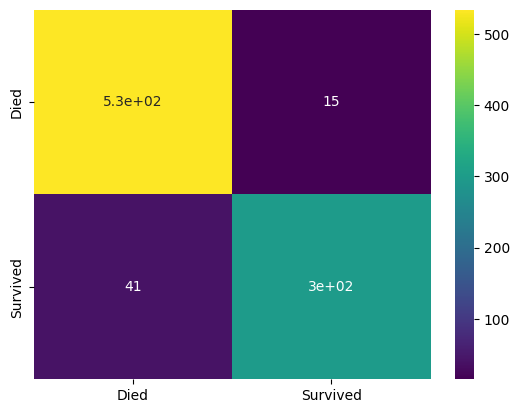

In [35]:
xt_lbl = ["Died", "Survived"]
yt_lbl = ["Died", "Survived"]
sns.heatmap(conf_mat, annot=True, cmap='viridis', xticklabels=xt_lbl, yticklabels=yt_lbl)

#### Deployment

In [36]:
y_pred = final_model.predict(X_test)
submission = pd.DataFrame(y_pred, index=X_test.index, columns=["Survived"])
submission

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [37]:
submission.to_csv('data/submission.csv')

In [38]:
pd.read_csv('data/submission.csv', index_col="PassengerId")

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
